In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the store and train datasets
store_data = pd.read_csv('../data/store.csv')
train_data = pd.read_csv('../data/train.csv')

In [5]:
print(store_data.head())

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [6]:
print(train_data.head())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [7]:
# Merge the datasets on the 'Store' column
merged_data = pd.merge(train_data, store_data, on='Store', how='inner')
# Check the first few rows of the merged dataset
print(merged_data.head())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                   

In [8]:
merged_data.to_csv('../data/merged_store_train_data.csv', index=False)
print("Merged dataset saved as 'merged_store_train_data.csv'.")

Merged dataset saved as 'merged_store_train_data.csv'.


#### Data Cleaning

In [11]:
print(merged_data.isnull().sum())

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


In [ ]:
merged_data['CompetitionDistance'].fillna(0, inplace=True)
merged_data['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
merged_data['CompetitionOpenSinceYear'].fillna(0, inplace=True)
merged_data['Promo2SinceWeek'].fillna(0, inplace=True)
merged_data['Promo2SinceYear'].fillna(0, inplace=True)
merged_data['PromoInterval'].fillna('None', inplace=True)

In [14]:
print(merged_data.isnull().sum())

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [15]:
duplicates = merged_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


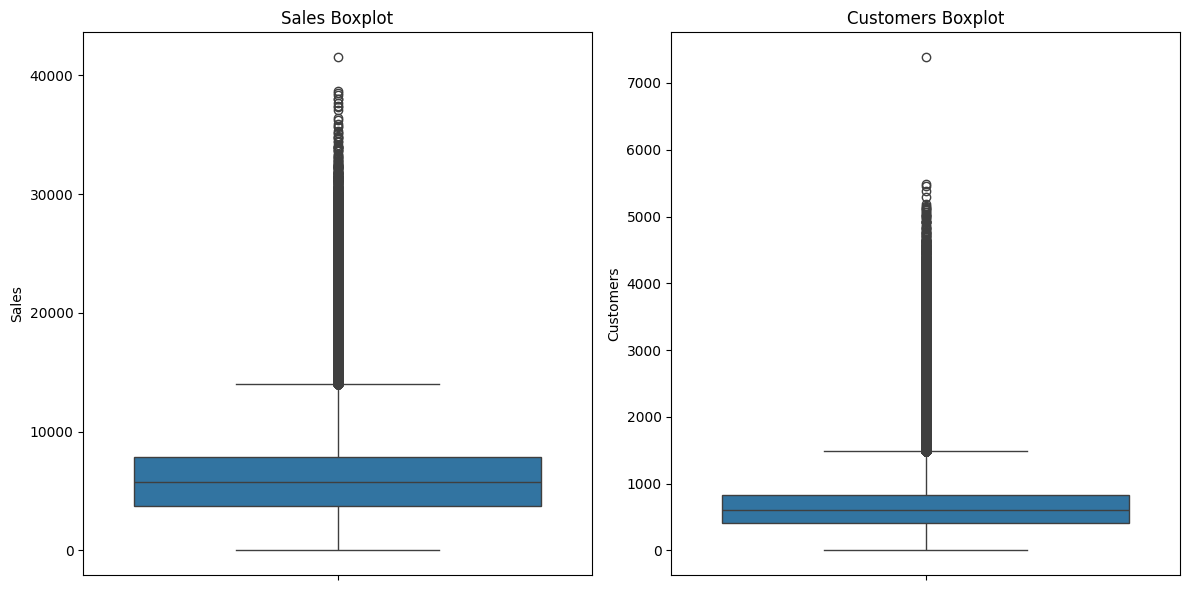

In [17]:
# Boxplot for Sales and Customers to detect outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=merged_data['Sales'])
plt.title('Sales Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(y=merged_data['Customers'])
plt.title('Customers Boxplot')

plt.tight_layout()
plt.show()


In [18]:
# Calculate IQR for Sales
Q1_sales = merged_data['Sales'].quantile(0.25)
Q3_sales = merged_data['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

# Calculate IQR for Customers
Q1_customers = merged_data['Customers'].quantile(0.25)
Q3_customers = merged_data['Customers'].quantile(0.75)
IQR_customers = Q3_customers - Q1_customers

lower_bound_customers = Q1_customers - 1.5 * IQR_customers
upper_bound_customers = Q3_customers + 1.5 * IQR_customers

# Remove outliers
cleaned_data = merged_data[
    (merged_data['Sales'] >= lower_bound_sales) & 
    (merged_data['Sales'] <= upper_bound_sales) &
    (merged_data['Customers'] >= lower_bound_customers) &
    (merged_data['Customers'] <= upper_bound_customers)
]


In [ ]:
# Convert 'Date' to datetime
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

# Convert categorical variables
categorical_columns = ['StoreType', 'Assortment', 'StateHoliday', 'PromoInterval']
for col in categorical_columns:
    cleaned_data[col] = cleaned_data[col].astype('category')


In [21]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 971403 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      971403 non-null  int64         
 1   DayOfWeek                  971403 non-null  int64         
 2   Date                       971403 non-null  datetime64[ns]
 3   Sales                      971403 non-null  int64         
 4   Customers                  971403 non-null  int64         
 5   Open                       971403 non-null  int64         
 6   Promo                      971403 non-null  int64         
 7   StateHoliday               971403 non-null  category      
 8   SchoolHoliday              971403 non-null  int64         
 9   StoreType                  971403 non-null  category      
 10  Assortment                 971403 non-null  category      
 11  CompetitionDistance        971403 non-null  float64     

In [ ]:
# Extract day of the week
cleaned_data['DayOfWeek'] = cleaned_data['Date'].dt.dayofweek

#### Distribution of Promotions in Training and Test Sets

In [ ]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

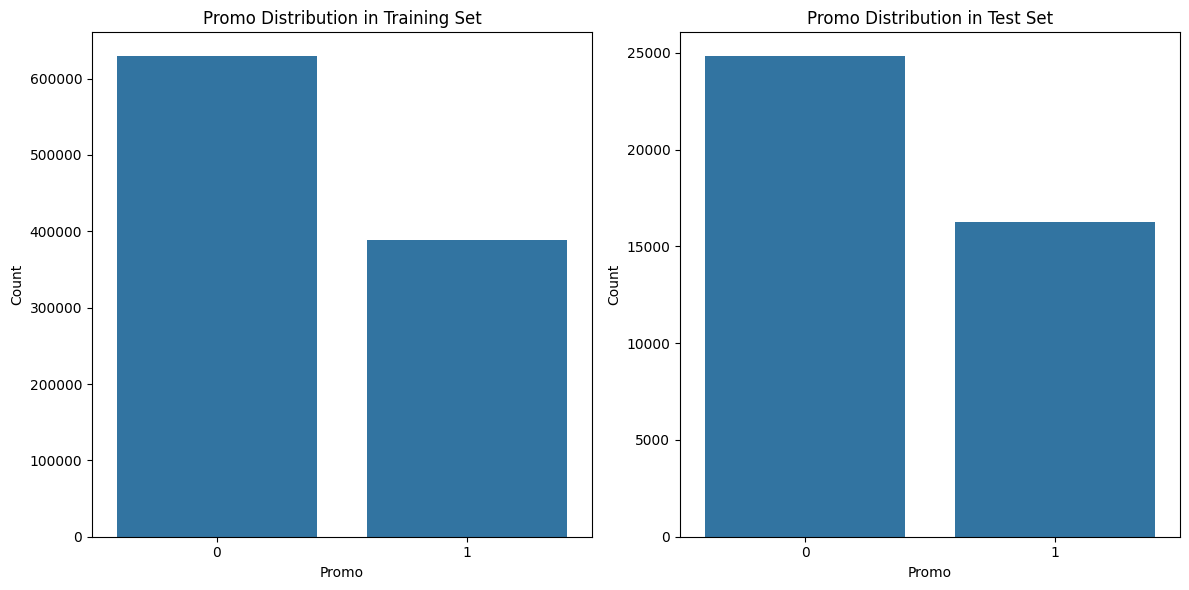

In [26]:
# Create subplots for training and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Promo distribution in training set
sns.countplot(data=train, x='Promo', ax=axes[0])
axes[0].set_title('Promo Distribution in Training Set')
axes[0].set_xlabel('Promo')
axes[0].set_ylabel('Count')

# Promo distribution in test set
sns.countplot(data=test, x='Promo', ax=axes[1])
axes[1].set_title('Promo Distribution in Test Set')
axes[1].set_xlabel('Promo')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

#### Sales Behavior Before, During, and After Holidays

C:\Users\pc\AppData\Local\Temp\ipykernel_11040\743790847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])
C:\Users\pc\AppData\Local\Temp\ipykernel_11040\743790847.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_sales = cleaned_data.groupby('StateHoliday')['Sales'].mean()


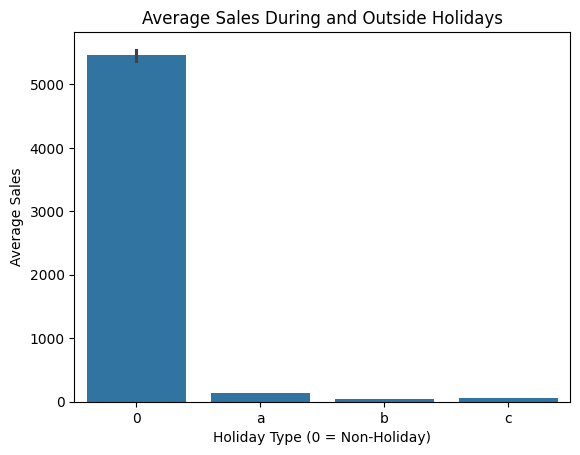

In [27]:
# Convert Date column to datetime type for easy filtering
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

# Group data by StateHoliday and calculate average sales
holiday_sales = cleaned_data.groupby('StateHoliday')['Sales'].mean()

# Plotting the sales during holidays vs non-holidays
sns.barplot(x=holiday_sales.index, y=holiday_sales.values)
plt.title('Average Sales During and Outside Holidays')
plt.ylabel('Average Sales')
plt.xlabel('Holiday Type (0 = Non-Holiday)')
plt.show()


#### Seasonal Purchase Behaviors (Christmas, Easter, etc.)

C:\Users\pc\AppData\Local\Temp\ipykernel_11040\713727061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Month'] = cleaned_data['Date'].dt.month
C:\Users\pc\AppData\Local\Temp\ipykernel_11040\713727061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Year'] = cleaned_data['Date'].dt.year


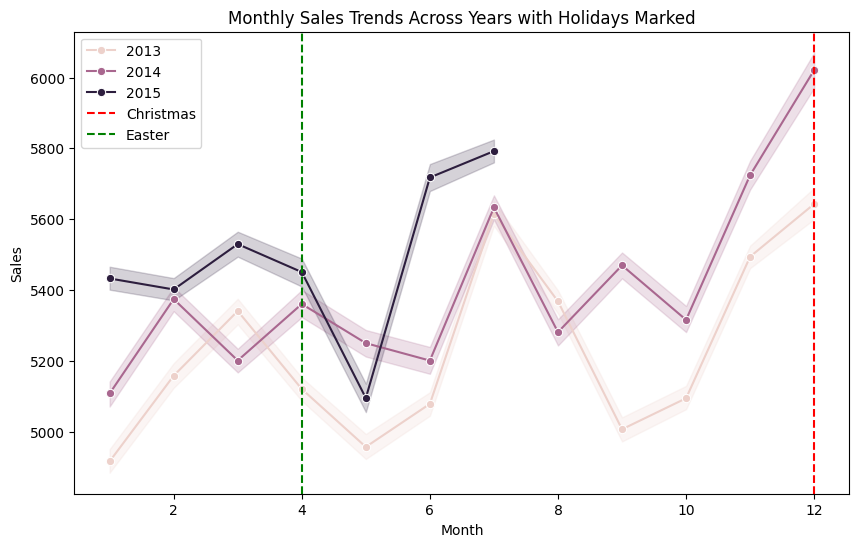

In [39]:
# Extract month and year from the date for seasonality analysis
cleaned_data['Month'] = cleaned_data['Date'].dt.month
cleaned_data['Year'] = cleaned_data['Date'].dt.year

# Plot sales over time (months)
plt.figure(figsize=(10, 6))
sns.lineplot(data=cleaned_data, x='Month', y='Sales', hue='Year', marker='o')

# Mark Christmas (December) and Easter (usually April) on the plot
plt.axvline(x=12, color='red', linestyle='--', label='Christmas')  # Christmas in December
plt.axvline(x=4, color='green', linestyle='--', label='Easter')    # Easter in April (approx.)

# Add titles and labels
plt.title('Monthly Sales Trends Across Years with Holidays Marked')
plt.xlabel('Month')
plt.ylabel('Sales')

# Display the legend for the holidays
plt.legend()

plt.show()

#### Correlation Between Sales and Number of Customers

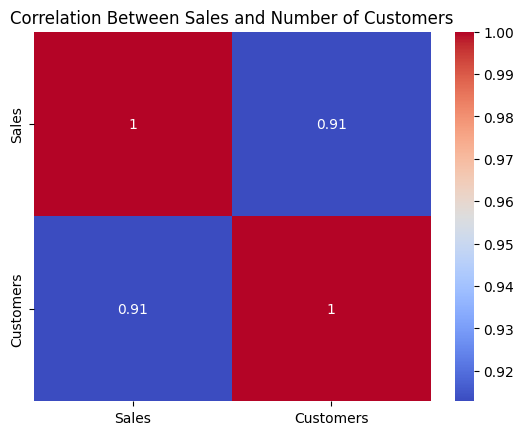

In [29]:
# Calculate correlation between Sales and Customers
correlation = cleaned_data[['Sales', 'Customers']].corr()

# Visualize the correlation
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Sales and Number of Customers')
plt.show()


#### Effect of Promo on Sales

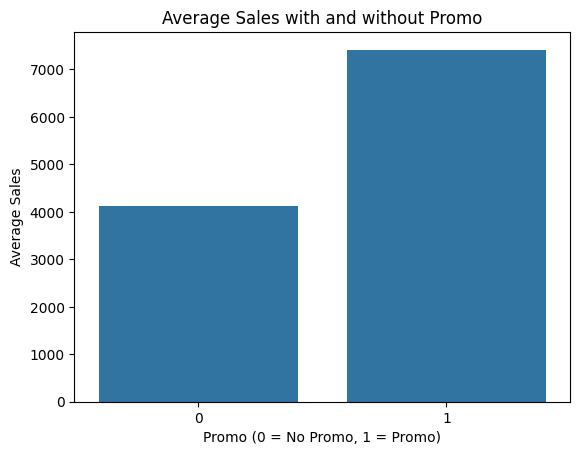

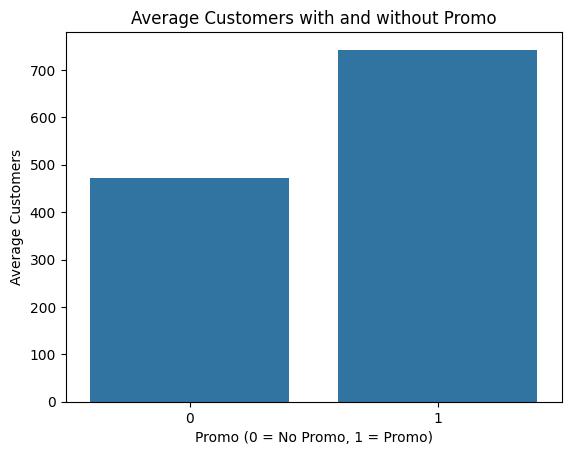

In [30]:
# Compare sales with and without promotions
promo_sales = cleaned_data.groupby('Promo')['Sales'].mean()

# Plot average sales with and without promo
sns.barplot(x=promo_sales.index, y=promo_sales.values)
plt.title('Average Sales with and without Promo')
plt.ylabel('Average Sales')
plt.xlabel('Promo (0 = No Promo, 1 = Promo)')
plt.show()

# Similarly, check for customer numbers during promotions
promo_customers = cleaned_data.groupby('Promo')['Customers'].mean()

# Plot average customers with and without promo
sns.barplot(x=promo_customers.index, y=promo_customers.values)
plt.title('Average Customers with and without Promo')
plt.ylabel('Average Customers')
plt.xlabel('Promo (0 = No Promo, 1 = Promo)')
plt.show()


#### Effectiveness of Promo Deployment and Stores to Target

c:\Users\pc\Desktop\Kifiya\KAIMW4\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


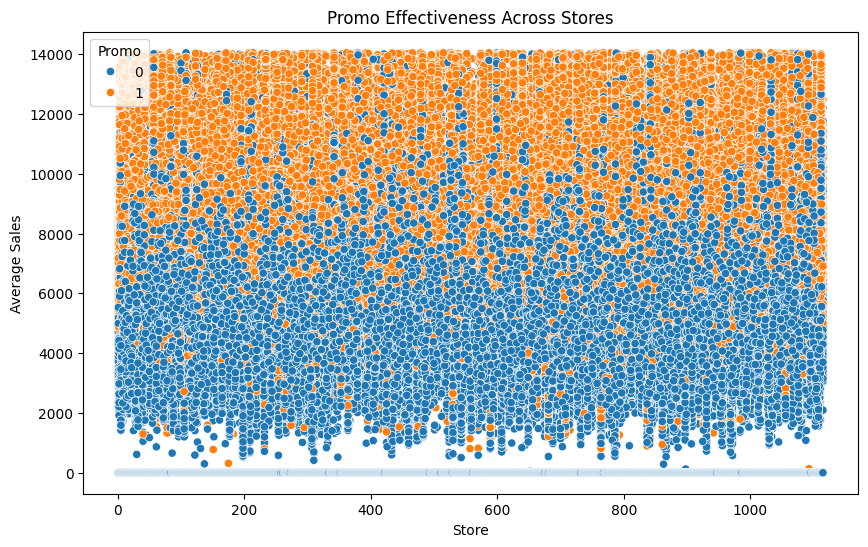

In [43]:
# Create a scatter plot to show sales during promo and non-promo periods
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Store', y='Sales', hue='Promo', data=cleaned_data)
plt.title('Promo Effectiveness Across Stores')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.show()


#### Trends of Customer Behavior During Store Opening and Closing Times

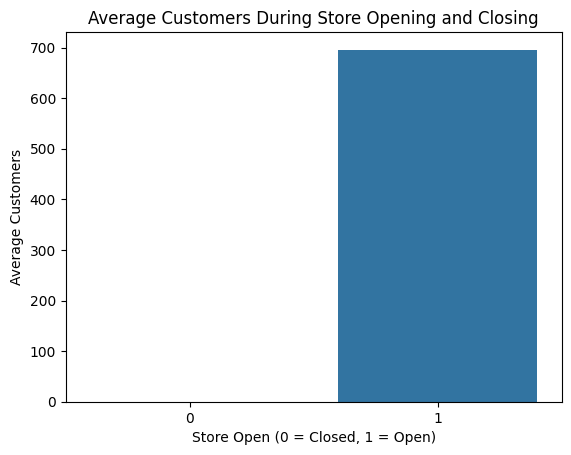

In [32]:
# Plot average customers during open and closed times
open_customers = cleaned_data.groupby('Open')['Customers'].mean()

sns.barplot(x=open_customers.index, y=open_customers.values)
plt.title('Average Customers During Store Opening and Closing')
plt.ylabel('Average Customers')
plt.xlabel('Store Open (0 = Closed, 1 = Open)')
plt.show()


####  Stores Open on All Weekdays and Their Weekend Sales

                       Open Weekdays Stores  Other Stores
Average Weekend Sales                   0.0     93.344577


<Figure size 800x500 with 0 Axes>

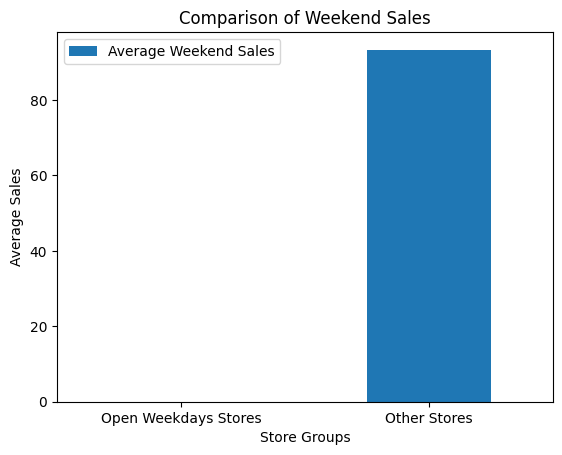

In [47]:
# Filter for stores open on all weekdays (Monday=1 to Friday=5)
weekdays_data = cleaned_data[cleaned_data['DayOfWeek'].isin([1, 2, 3, 4, 5])]

# Group by Store and check if they are open on all weekdays
stores_open_weekdays = weekdays_data.groupby('Store')['Open'].sum() == 5

# Get the list of stores that are open on all weekdays
open_weekdays_stores = stores_open_weekdays[stores_open_weekdays].index
# Filter for weekend sales (Saturday=6, Sunday=7)
weekend_data = cleaned_data[cleaned_data['DayOfWeek'].isin([6, 7])]

# Separate data for stores open on all weekdays and those that are not
weekend_sales_open_weekdays = weekend_data[weekend_data['Store'].isin(open_weekdays_stores)]
weekend_sales_other_stores = weekend_data[~weekend_data['Store'].isin(open_weekdays_stores)]

# Calculate average weekend sales for both groups
avg_sales_open_weekdays = weekend_sales_open_weekdays.groupby('Store')['Sales'].mean()
avg_sales_other_stores = weekend_sales_other_stores.groupby('Store')['Sales'].mean()

# Create a DataFrame to compare the two groups
comparison_df = pd.DataFrame({
    'Open Weekdays Stores': avg_sales_open_weekdays.mean(),
    'Other Stores': avg_sales_other_stores.mean()
}, index=['Average Weekend Sales'])

# Display the comparison
print(comparison_df)
# Visualize the comparison of average weekend sales
plt.figure(figsize=(8, 5))
comparison_df.T.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Comparison of Weekend Sales')
plt.ylabel('Average Sales')
plt.xlabel('Store Groups')
plt.xticks(rotation=0)
plt.show()


#### Effect of Assortment Type on Sales

C:\Users\pc\AppData\Local\Temp\ipykernel_11040\3561210929.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  assortment_sales = cleaned_data.groupby('Assortment')['Sales'].mean()


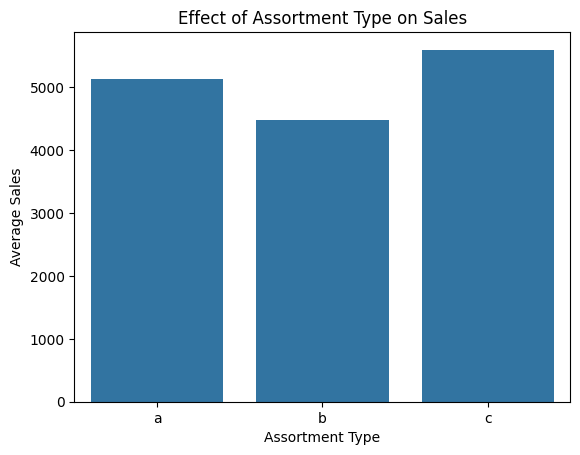

In [34]:
# Group by assortment type and calculate average sales
assortment_sales = cleaned_data.groupby('Assortment')['Sales'].mean()

# Visualize assortment effect on sales
sns.barplot(x=assortment_sales.index, y=assortment_sales.values)
plt.title('Effect of Assortment Type on Sales')
plt.ylabel('Average Sales')
plt.xlabel('Assortment Type')
plt.show()


#### Effect of Distance to Competitors on Sales

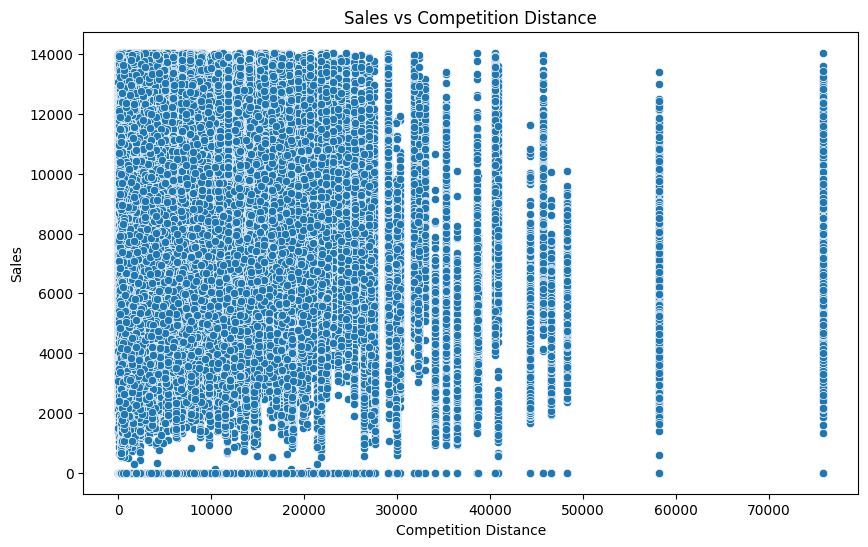

In [44]:
# Plot sales vs competition distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=cleaned_data)
plt.title('Sales vs Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()


#### Effect of Opening or Reopening Competitors

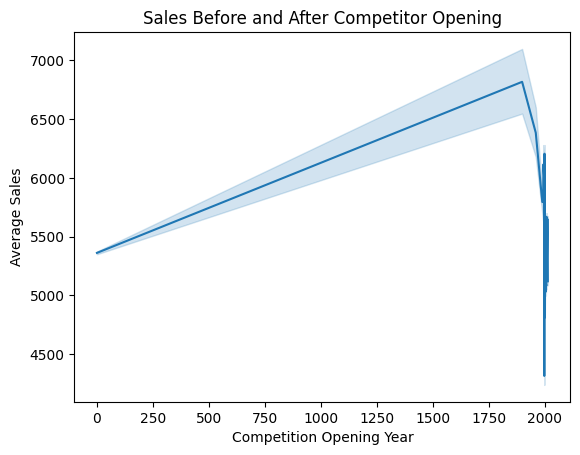

In [46]:
# Filter stores that had competitors opening
competing_stores = cleaned_data[cleaned_data['CompetitionDistance'].notnull() & cleaned_data['CompetitionOpenSinceYear'].notnull()]

# Plot average sales before and after competitor opening
sns.lineplot(data=competing_stores, x='CompetitionOpenSinceYear', y='Sales')
plt.title('Sales Before and After Competitor Opening')
plt.xlabel('Competition Opening Year')
plt.ylabel('Average Sales')
plt.show()
